# Sam Federico Final Project Generalized Lotka Volterra Expansion

This notebook runs in environment CSB3. It uses the sbml library (that is downloaded with COBRA) to load the models.

## Overview

The generlized Lotka-Volterra model is a general version of the original predator prey model that can be applied to model interacting communities of organisms with any number of organisms and types of interactions. In this notebook I have modified the code from class to show gLV applied in different microbiome scenarios: bacteriodetes antibiotics with differing levels of effectiveness.


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from libsbml import *

### Computational Model



In [4]:
# Define Function (matrix form)
def gLV_dynamics(t,y,n,mu,alpha):
    #y = species (n total)
    dydt = np.zeros(n)
    
    # vectorized form of gLV model
    dydt = y*(mu+np.matmul(alpha,y))
    
    return dydt

### Simplified Gut Microbiome Community

In Venturelli et al, the generalized Lotka-Volterra model is used to describe a 12 member synthetic microbial community that is made up of bacterial isolates from the human gut microbiome.

The species and their associations with different diseases are described in table 1 of the paper, and a phylogenetic tree relating the organisms is shown in Figure 1A:

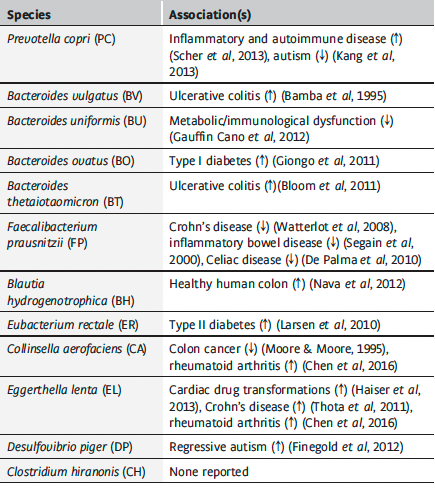
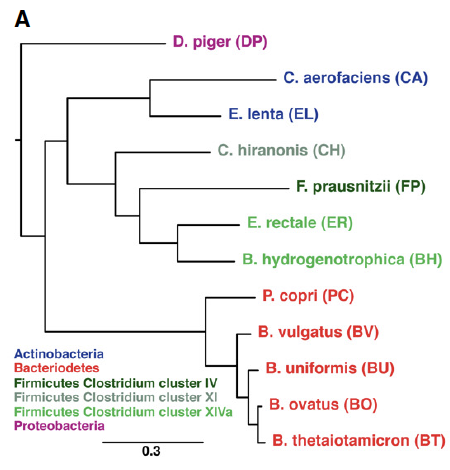

The generalized lotka volterra models for this community are obtained by inferring the model parameters from several different sets of data. The training data sets used are:
* T1 - fit to monoculture (M) data only
* T2 - fit to M and equal inoculum pairwise data (PW1)
* T3 - fit to M, PW1, and unequal inoculum pairwise data (PW2)
* T4 - fit to M, PW1, PW2, and full 12-member community data

Each of these models (and their associated parameters) are available online alongside the paper:
* https://jjj.bio.vu.nl/models/?id=venturelli
* They are also provided in the Models folder accompanying this notebook

Here we will load these models, visualize their parameters, and simulate their dynamics.

In [6]:
# Load Models
# We will load the sbml models and then do some text parsing to get the parameters into the growth rate vector and interaction matrix that we want.

# List of organisms in phylogenetic order:
#orgs = np.array(['BH','BO','BT','BU','BV','CA','CH','DP','EL','ER','FP','PC']) #alphabetical
orgs = np.array(['BT','BO','BU','BV','PC','BH','ER','FP','CH','EL','CA','DP']) #phylogenetic

# Load Model 1
mu_1 = np.zeros([12])
alpha_1 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli1.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_1[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_1[ind1]=tmp2

# Load Model 2
mu_2 = np.zeros([12])
alpha_2 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli2.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_2[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_2[ind1]=tmp2
        
# Load Model 3
mu_3 = np.zeros([12])
alpha_3 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli3.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_3[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_3[ind1]=tmp2

# Load Model 4
mu_4 = np.zeros([12])
alpha_4 = np.zeros([12,12])
reader = SBMLReader()
document = reader.readSBMLFromFile("Models/venturelli4.xml")
model = document.getModel()
for i in range(len(model.parameters)): #loop through parameters
    tmp1 = model.parameters[i].id
    tmp2 = model.parameters[i].value
    if tmp1[0]=='a': #alpha matrix parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        ind2 = np.argwhere(orgs==tmp1[3:5])[0][0]
        alpha_4[ind1,ind2]=tmp2
    if tmp1[0]=='u': #mu vector parameters
        ind1 = np.argwhere(orgs==tmp1[1:3])[0][0]
        mu_4[ind1]=tmp2

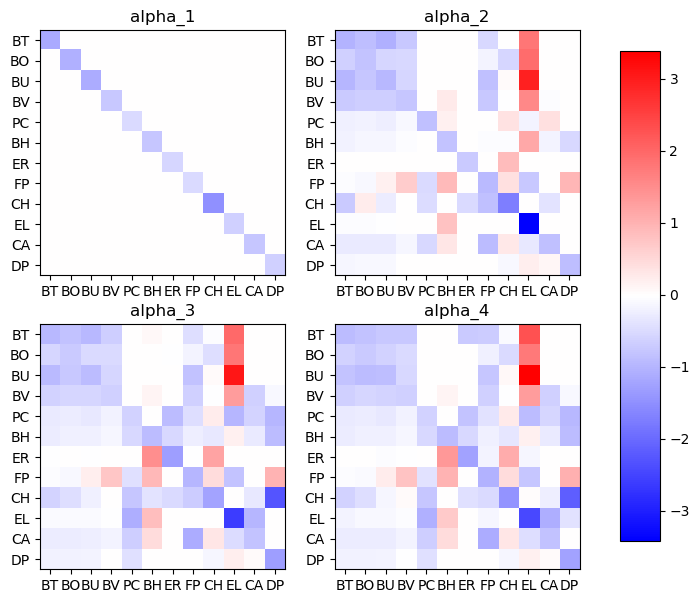

In [7]:
[fig,axs] = plt.subplots(2,2,figsize=[8,7])

minval = np.min([alpha_1,alpha_2,alpha_3,alpha_4])
maxval = np.max([alpha_1,alpha_2,alpha_3,alpha_4])

axs[0,0].imshow(alpha_1,cmap="bwr", vmin=minval, vmax=maxval)
axs[0,0].set_title('alpha_1')
axs[0,0].set_xticks(range(12))
axs[0,0].set_xticklabels(orgs)
axs[0,0].set_yticks(range(12))
axs[0,0].set_yticklabels(orgs)

axs[0,1].imshow(alpha_2,cmap="bwr", vmin=minval, vmax=maxval)
axs[0,1].set_title('alpha_2')
axs[0,1].set_xticks(range(12))
axs[0,1].set_xticklabels(orgs)
axs[0,1].set_yticks(range(12))
axs[0,1].set_yticklabels(orgs)

axs[1,0].imshow(alpha_3,cmap="bwr", vmin=minval, vmax=maxval)
axs[1,0].set_title('alpha_3')
axs[1,0].set_xticks(range(12))
axs[1,0].set_xticklabels(orgs)
axs[1,0].set_yticks(range(12))
axs[1,0].set_yticklabels(orgs)

im=axs[1,1].imshow(alpha_4,cmap="bwr", vmin=minval, vmax=maxval)
axs[1,1].set_title('alpha_4');
axs[1,1].set_xticks(range(12))
axs[1,1].set_xticklabels(orgs)
axs[1,1].set_yticks(range(12))
axs[1,1].set_yticklabels(orgs);

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

### Simulating Dynamics

This is the original model 4 with the only modification being a simple few lines of code to calculate the difference in species density at the bottom of the cell - somewhat similar to the absolute counts used in the Jinju et al article.

Total Starting Density = 1.206.
Total Resulting Density = 1.277 at t = 100.0.
Overall Difference is + 0.070.
---------------------
Change in BT = -0.100.
Change in BO = 0.602.
Change in BU = 0.063.
Change in BV = -0.095.
Change in PC = -0.101.
Change in BH = -0.101.
Change in ER = -0.031.
Change in FP = 0.069.
Change in CH = -0.101.
Change in EL = 0.002.
Change in CA = -0.101.
Change in DP = -0.038.


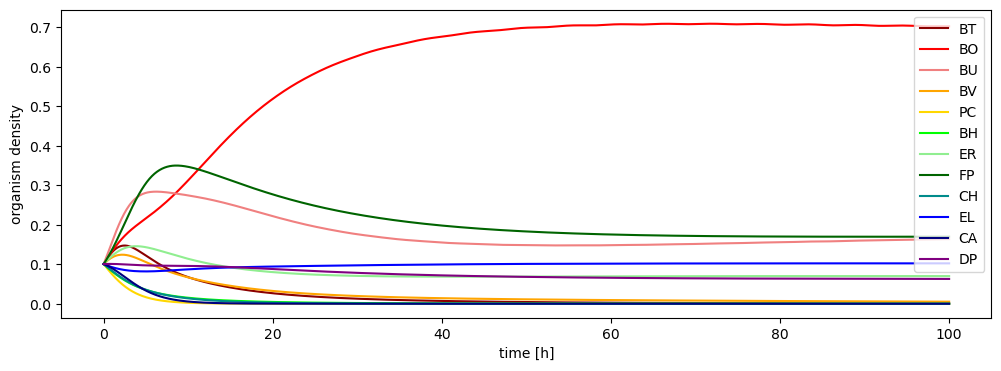

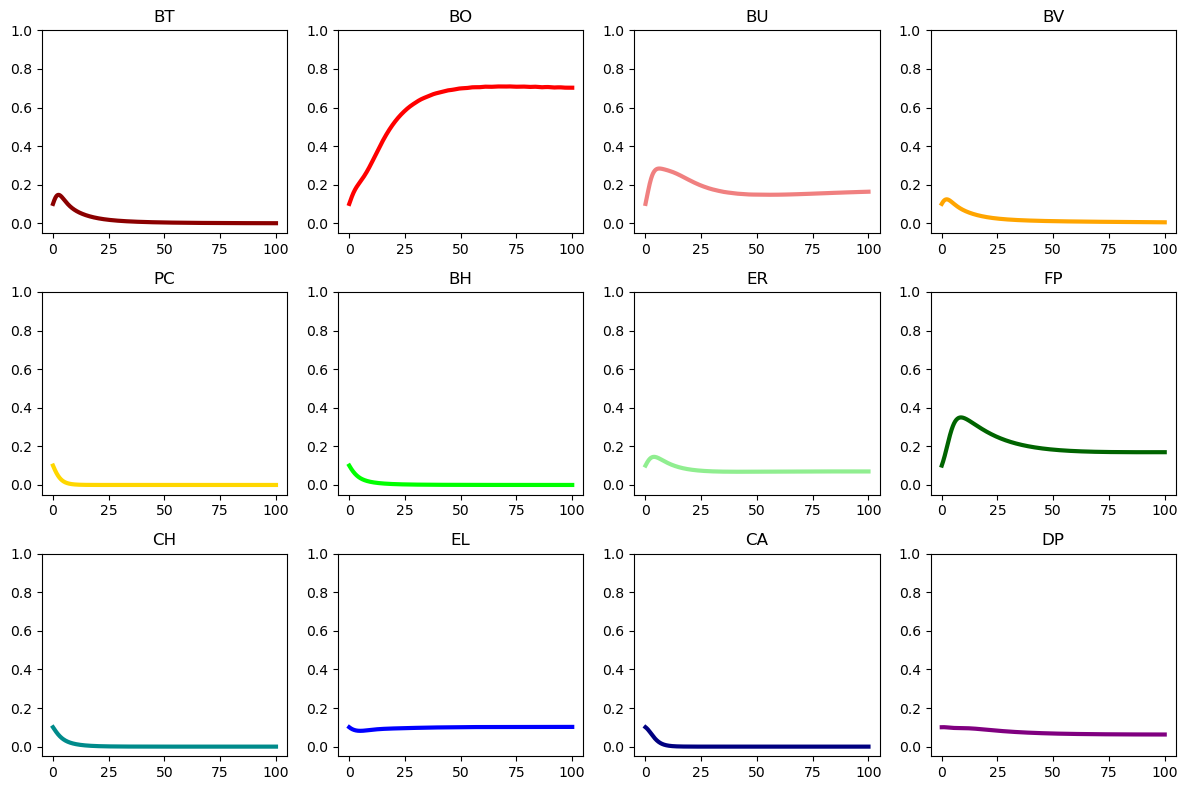

In [10]:
# Define Parameters
n = 12
# USING MODEL 4 - WHOLE COMMUNITY SIM
mu = mu_4
alpha = alpha_4

y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise

# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))

# Plot all
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
colors = ['darkred','red','lightcoral','orange','gold',
          'lime','lightgreen',
          'darkgreen',
          'darkcyan',
          'blue','navy',
          'purple']
for i in range(n):
    axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])
axs.legend(orgs)
axs.set_ylabel('organism density')
axs.set_xlabel('time [h]');

# Plot all separately
[fig,axs] = plt.subplots(3,4,figsize=[12,8])
for i in range(n):
    i1 = int(np.floor(i/4))
    i2 = int(np.mod(i,4))
    axs[i1,i2].plot(ode_sol.t,ode_sol.y[i],'-',color=colors[i],linewidth=3)
    axs[i1,i2].set_title(orgs[i])
    axs[i1,i2].tick_params(axis='both', which='major', labelsize=10)
    axs[i1,i2].set_ylim([-0.05, 1])

fig.tight_layout()

#starting tota density
s_density = np.sum(y0)
print(f'Total Starting Density = {s_density:.3f}.')

#now some code to fetch total densities - using values at 100H for each one
#prime it at 0
final_density = 0
#loop to += each solution at 100H
for i in range(len(y0)):
    final_density += ode_sol.y[i][-1] #yi = each sample, -1 index for last time entry value

#print the total resulting density at 100H
print(f'Total Resulting Density = {final_density:.3f} at t = {t[-1]}.')
print(f'Overall Difference is + {(final_density-s_density):.3f}.')
print('---------------------')
#now for each species
for i in range(len(y0)):
    change = ode_sol.y[i][-1]-y0[i]
    print(f'Change in {orgs[i]} = {change:.3f}.')

Below is the first modified version of model 4 accounting for antibiotic disturbance (bacteriodetes completely elimated by antibiotic). Above, the original model is used for comparison. As seen, using antibiotics to kill off a certain phylum of bacteria has some effects on the community as a whole. The total resulting biomass and diversity are decreased, as would be expected after antibiotic treatment. However, removing this phylum removes some negative interactions in the community allowing other species, most notably FP, EL, and DP to grow. This is in line with the ideas discussed especially in the Hromada et all article which says that when these negative interactions are removed, other species can capitalize on the opportunity.

Interestingly, EL has some positive interactions with the Bacteriodetes in the above alpha plots, so it is strange that removing the bacteriodetes increases ELs's population - something that alludes to the entire community interactions dominating over simple pairwise interactions.


Total Starting Density = 0.706.
Total Resulting Density = 0.707 at t = 100.0.
Overall Difference is + 0.001.
---------------------
Change in BT = 0.000.
Change in BO = 0.000.
Change in BU = 0.000.
Change in BV = 0.000.
Change in PC = 0.000.
Change in BH = -0.100.
Change in ER = -0.032.
Change in FP = 0.225.
Change in CH = -0.101.
Change in EL = 0.010.
Change in CA = -0.101.
Change in DP = 0.100.


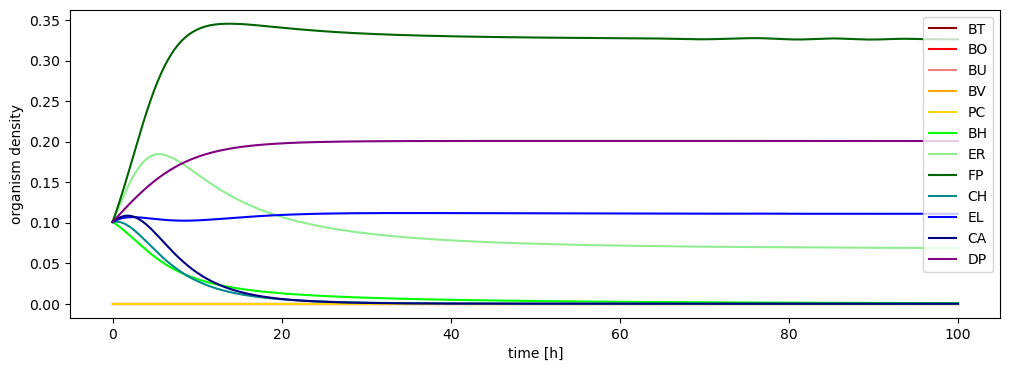

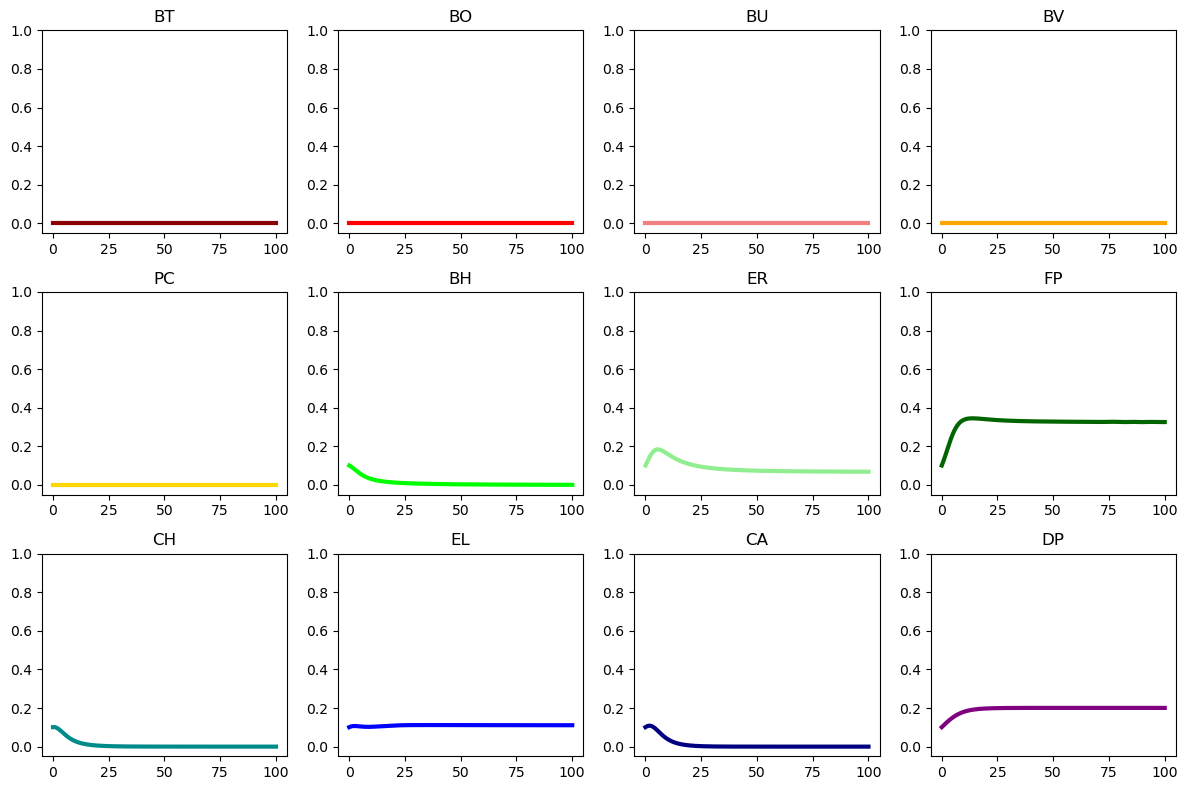

In [11]:
#MODIFIED VERSION - ANTIBIOTIC COMPLETELY ELIMINATES BACTERIODETES
# Define Parameters
n = 12
# USING MODEL 4 - WHOLE COMMUNITY SIM
mu = mu_4
alpha = alpha_4

y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise

# here is where we simulate a species of bacteria being totally eliminated  - parameters are edited
y0[0]=0
y0[1]=0
y0[2]=0
y0[3]=0
y0[4]=0

# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))

# Plot all
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
colors = ['darkred','red','lightcoral','orange','gold',
          'lime','lightgreen',
          'darkgreen',
          'darkcyan',
          'blue','navy',
          'purple']
for i in range(n):
    axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])
axs.legend(orgs)
axs.set_ylabel('organism density')
axs.set_xlabel('time [h]');

# Plot all separately
[fig,axs] = plt.subplots(3,4,figsize=[12,8])
for i in range(n):
    i1 = int(np.floor(i/4))
    i2 = int(np.mod(i,4))
    axs[i1,i2].plot(ode_sol.t,ode_sol.y[i],'-',color=colors[i],linewidth=3)
    axs[i1,i2].set_title(orgs[i])
    axs[i1,i2].tick_params(axis='both', which='major', labelsize=10)
    axs[i1,i2].set_ylim([-0.05, 1])

fig.tight_layout()

#starting tota density
s_density = np.sum(y0)
print(f'Total Starting Density = {s_density:.3f}.')

#now some code to fetch total densities - using values at 100H for each one
#prime it at 0
final_density = 0
#loop to += each solution at 100H
for i in range(len(y0)):
    final_density += ode_sol.y[i][-1] #yi = each sample, -1 index for last time entry value

#print the total resulting density at 100H
print(f'Total Resulting Density = {final_density:.3f} at t = {t[-1]}.')
print(f'Overall Difference is + {(final_density-s_density):.3f}.')
print('---------------------')
#now for each species
for i in range(len(y0)):
    change = ode_sol.y[i][-1]-y0[i]
    print(f'Change in {orgs[i]} = {change:.3f}.')

As is seen in the graphs above, eliminating the bacteriodetes phylum has some interesting effects on the community. Interestingly, the change in total biomass from start to finish is very small (changes slightly with each run - due to the noise added). Now what if the antibiotic wasn't fully effective - only eliminating say 99% of the original count?

Total Starting Density = 0.706.
Total Resulting Density = 1.274 at t = 100.0.
Overall Difference is + 0.568.
---------------------
Change in BT = -0.000.
Change in BO = 0.695.
Change in BU = 0.172.
Change in BV = -0.000.
Change in PC = -0.001.
Change in BH = -0.100.
Change in ER = -0.031.
Change in FP = 0.069.
Change in CH = -0.100.
Change in EL = 0.002.
Change in CA = -0.100.
Change in DP = -0.038.


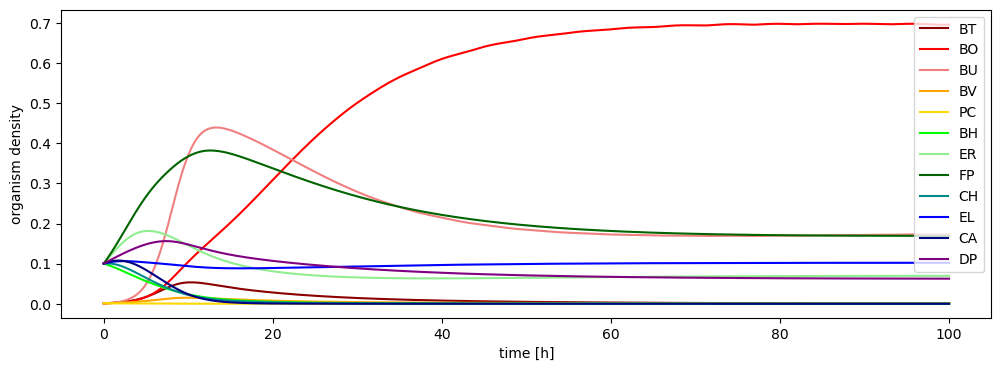

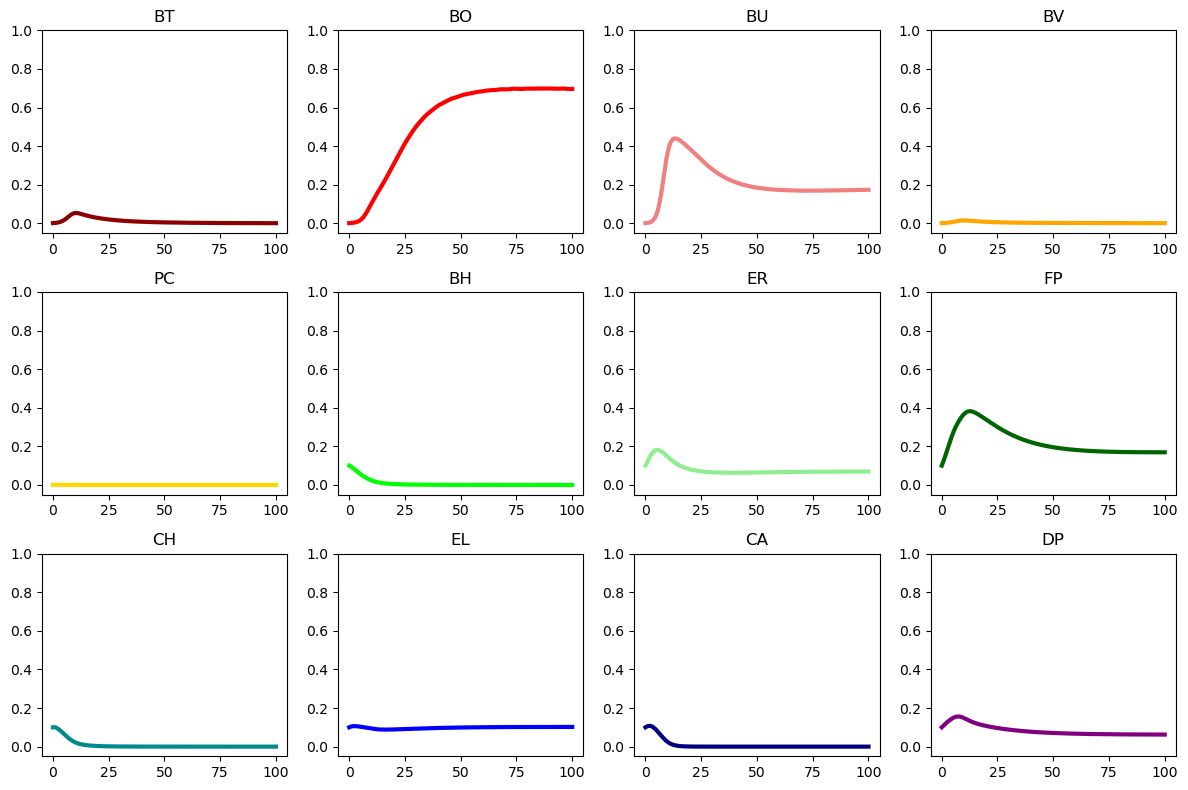

In [12]:
#MODIFIED VERSION - ANTIBIOTIC ELIMINATES 99% OF BACTERIODETES
# Define Parameters
n = 12
# USING MODEL 4 - WHOLE COMMUNITY SIM
mu = mu_4
alpha = alpha_4

y0 = 0.1*np.ones(n) + np.random.rand(1)*0.001 #equal initial abundance w/ some noise

# here is where we simulate a species of bacteria being 99% eliminated  - parameters are edited
y0[0]=y0[0]*0.01
y0[1]=y0[1]*0.01
y0[2]=y0[2]*0.01
y0[3]=y0[3]*0.01
y0[4]=y0[4]*0.01

# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol = solve_ivp(gLV_dynamics,tspan,y0,t_eval=t,args=(n,mu,alpha))

# Plot all
[fig,axs] = plt.subplots(1,1,figsize=[12,4])
colors = ['darkred','red','lightcoral','orange','gold',
          'lime','lightgreen',
          'darkgreen',
          'darkcyan',
          'blue','navy',
          'purple']
for i in range(n):
    axs.plot(ode_sol.t,ode_sol.y[i],color=colors[i])
axs.legend(orgs)
axs.set_ylabel('organism density')
axs.set_xlabel('time [h]');

# Plot all separately
[fig,axs] = plt.subplots(3,4,figsize=[12,8])
for i in range(n):
    i1 = int(np.floor(i/4))
    i2 = int(np.mod(i,4))
    axs[i1,i2].plot(ode_sol.t,ode_sol.y[i],'-',color=colors[i],linewidth=3)
    axs[i1,i2].set_title(orgs[i])
    axs[i1,i2].tick_params(axis='both', which='major', labelsize=10)
    axs[i1,i2].set_ylim([-0.05, 1])

fig.tight_layout()

#starting tota density
s_density = np.sum(y0)
print(f'Total Starting Density = {s_density:.3f}.')

#now some code to fetch total densities - using values at 100H for each one
#prime it at 0
final_density = 0
#loop to += each solution at 100H
for i in range(len(y0)):
    final_density += ode_sol.y[i][-1] #yi = each sample, -1 index for last time entry value

#print the total resulting density at 100H
print(f'Total Resulting Density = {final_density:.3f} at t = {t[-1]}.')
print(f'Overall Difference is + {(final_density-s_density):.3f}.')
print('---------------------')
#now for each species
for i in range(len(y0)):
    change = ode_sol.y[i][-1]-y0[i]
    print(f'Change in {orgs[i]} = {change:.3f}.')

Here we can see that even with a mere 1% of the original starting population, the interactions are enough that over 100 hours the growth of FP, EL, and DP were inhibited back to similar levels as before any antibiotic treatment at all and the bacteriodetes, particularly BO, look almost the same as if with no antibiotics at 100H. So if scientists were potentially desiging a drug with aims to eliminate BO, they would need it to be 100% effective. Models like these are extremely interesting and their applications to different scenarios (bacteriodetes antibiotics is only one possible scenario!) can help further our understanding of complex microbial interactions. Perhaps a further expansion of this analysis would be to have an antibiotic wipe out 99% of the population every 24H and see how the densities change with that recurring dose.